### Selection Assessment  - Engineering Analytics - Dialog Axiata PLC

#### Name: < Ravindu Alwis >
#### E Mail: < ravindurcg99@yahoo.com >

## The explanation part and answers to the given questions are highlighted in yellow.

### Part (a)
#### Load and assess "cx_churn_data.csv" dataset.

Explain how data was loaded...

<span style='background:yellow'>Used pandas python package to load the cx_churn_data.csv file. </span> 

In [1]:
import pandas as pd

df = pd.read_csv("cx_churn_data.csv")
df.head()

,cx_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_connections,internet_connection_type,device_insurance,call_center_support,dtv,dtv_viu,account_type,e_bill,payment_method,monthly_bill,total_bill,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,HBB,No,No,No,No,prepaid,Yes,app,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,HBB,Yes,No,No,No,postpaid,No,cash,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,HBB,No,No,No,No,prepaid,Yes,cash,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,HBB,Yes,Yes,No,No,postpaid,No,bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,MBB,No,No,No,No,prepaid,Yes,app,70.70,151.65,Yes


<span style='background:yellow'> The loaded data frame has named as df. </span> 

Explain the challenges encountered and describe dataset.

<span style='background:yellow'> Only the initial part of the data frame shows above. The Data frame has the customer's data that is related to the company. </span>

### Part (b)
#### Data cleansing

<span style='background:yellow'> The following part doing for cleansing the data. Firstly monitored the unique data in specific columns. </span>

In [2]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<span style='background:yellow'> The following part shows there are 6 varieties of data in the senior_citizen column instead of 2 varieties. </span>

In [3]:
df['senior_citizen'].value_counts()

0      5899
1      1138
yes       3
no        1
y         1
n         1
Name: senior_citizen, dtype: int64

<span style='background:yellow'> After identifying a variety of senior_citizen column data, changed them in a suitable way. </span>

In [4]:
df['senior_citizen'] = df['senior_citizen'].replace({'yes':'Yes','no':'No','y':'Yes','n':'No','1':'Yes','0':'No'})
df['senior_citizen'].value_counts()

No     5901
Yes    1142
Name: senior_citizen, dtype: int64

In [5]:
df['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [6]:
df['dependents'].value_counts()

No     4932
Yes    2110
Name: dependents, dtype: int64

In [7]:
df['phone_service'].value_counts()

Yes    6359
No      682
Name: phone_service, dtype: int64

In [8]:
df['multiple_connections'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_connections, dtype: int64

In [9]:
df['internet_connection_type'].value_counts()

MBB    3095
HBB    2419
No     1526
Name: internet_connection_type, dtype: int64

In [10]:
df['device_insurance'].value_counts()

No     4621
Yes    2420
Name: device_insurance, dtype: int64

In [11]:
df['call_center_support'].value_counts()

No     4998
Yes    2041
Name: call_center_support, dtype: int64

In [12]:
df['dtv'].value_counts()

No     4334
Yes    2706
Name: dtv, dtype: int64

In [13]:
df['dtv_viu'].value_counts()

No     4310
Yes    2731
Name: dtv_viu, dtype: int64

In [14]:
df['account_type'].value_counts()

prepaid       3874
enterprise    1695
postpaid      1473
Name: account_type, dtype: int64

In [15]:
df['e_bill'].value_counts()

Yes    4171
No     2871
Name: e_bill, dtype: int64

In [16]:
df['payment_method'].value_counts()

app              2364
cash             1612
bank transfer    1543
credit card      1519
Name: payment_method, dtype: int64

In [17]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

<span style='background:yellow'> Checked all the specific columns and there are no furthermore varied data columns. </span>

<span style='background:yellow'> cx_id column does not need to predict. Due to that remove it from the data frame. </span>

In [18]:
df.drop('cx_id',axis='columns',inplace=True)

<span style='background:yellow'> The data frame may contain Null values. Followings use to identify Null value included columns. </span>

In [19]:
df.isnull().sum()

gender                      0
senior_citizen              0
partner                     0
dependents                  1
tenure                      0
phone_service               2
multiple_connections        0
internet_connection_type    3
device_insurance            2
call_center_support         4
dtv                         3
dtv_viu                     2
account_type                1
e_bill                      1
payment_method              5
monthly_bill                1
total_bill                  0
churn                       0
dtype: int64

<span style='background:yellow'> Identifying the total rows that Null values included. </span>

In [20]:
df.isnull().sum().sum()

25

<span style='background:yellow'> There are only 25 rows that contain Null values. The total number of data rows in the data frame is 7044. Due to that removing the 25 rows that contain Null values can ignore. After dropping the Null value rows, named the new data frame as new_df. </span>

In [21]:
df.fillna('NaN')
new_df = df.dropna(axis=0,how='any')
new_df.isnull().sum()

gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_connections        0
internet_connection_type    0
device_insurance            0
call_center_support         0
dtv                         0
dtv_viu                     0
account_type                0
e_bill                      0
payment_method              0
monthly_bill                0
total_bill                  0
churn                       0
dtype: int64

<span style='background:yellow'>Identifying the datatypes of each column.</span>

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7022 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7022 non-null   object 
 1   senior_citizen            7022 non-null   object 
 2   partner                   7022 non-null   object 
 3   dependents                7022 non-null   object 
 4   tenure                    7022 non-null   int64  
 5   phone_service             7022 non-null   object 
 6   multiple_connections      7022 non-null   object 
 7   internet_connection_type  7022 non-null   object 
 8   device_insurance          7022 non-null   object 
 9   call_center_support       7022 non-null   object 
 10  dtv                       7022 non-null   object 
 11  dtv_viu                   7022 non-null   object 
 12  account_type              7022 non-null   object 
 13  e_bill                    7022 non-null   object 
 14  payment_

<span style='background:yellow'>According to the above step, the data type of the total_bill is not a numeric value.</span>

In [23]:
new_df.total_bill.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

<span style='background:yellow'>Changing the datatype of total_bill column to numeric values. But there was an error to run the code due to the blank values in total_bill column.</span>

In [24]:
pd.to_numeric(new_df.total_bill)

ValueError: Unable to parse string " " at position 488

<span style='background:yellow'>Counting the Null value rows in total_bill row.</span>

In [25]:
df.query(" total_bill ==' ' ").shape[0]

11

<span style='background:yellow'>There are only 11 Null value rows. Due to that remove the Null value rows from total_bill column and assigning new values to the total_bill column.</span>

In [26]:
new_df = new_df[new_df.total_bill!=' ']
new_df.total_bill = pd.to_numeric(new_df.total_bill)

<span style='background:yellow'>During the above step identified the data type of the tenure column is an integer. Changed it to float data type if there are calculations.</span>

In [27]:
new_df['tenure'] = new_df['tenure'].astype(float)

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7011 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7011 non-null   object 
 1   senior_citizen            7011 non-null   object 
 2   partner                   7011 non-null   object 
 3   dependents                7011 non-null   object 
 4   tenure                    7011 non-null   float64
 5   phone_service             7011 non-null   object 
 6   multiple_connections      7011 non-null   object 
 7   internet_connection_type  7011 non-null   object 
 8   device_insurance          7011 non-null   object 
 9   call_center_support       7011 non-null   object 
 10  dtv                       7011 non-null   object 
 11  dtv_viu                   7011 non-null   object 
 12  account_type              7011 non-null   object 
 13  e_bill                    7011 non-null   object 
 14  payment_

<span style='background:yellow'>Identifying the unique values in each column that data type was the object. </span>

In [29]:
def unique_column_values(new_df):
       for column in new_df:
            if new_df[column].dtypes=='object':
                print(f'{column}: {new_df[column].unique()}') 

unique_column_values(new_df)

gender: ['Female' 'Male']
senior_citizen: ['No' 'Yes']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phone_service: ['No' 'Yes']
multiple_connections: ['No phone service' 'No' 'Yes']
internet_connection_type: ['HBB' 'MBB' 'No']
device_insurance: ['No' 'Yes']
call_center_support: ['No' 'Yes']
dtv: ['No' 'Yes']
dtv_viu: ['No' 'Yes']
account_type: ['prepaid' 'postpaid' 'enterprise']
e_bill: ['Yes' 'No']
payment_method: ['app' 'cash' 'bank transfer' 'credit card']
churn: ['No' 'Yes']


<span style='background:yellow'>Setting 1 and 0 to columns that contain the unique values as Yes and No. </span>

In [30]:
binary_value_columns = ['senior_citizen','partner','dependents','phone_service','device_insurance','call_center_support','dtv','dtv_viu','e_bill','churn']
for column in binary_value_columns:
    new_df[column].replace({'Yes': 1,'No': 0},inplace=True)

for column in new_df:
    print(f'{column}: {new_df[column].unique()}')

gender: ['Female' 'Male']
senior_citizen: [0 1]
partner: [1 0]
dependents: [0 1]
tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
phone_service: [0 1]
multiple_connections: ['No phone service' 'No' 'Yes']
internet_connection_type: ['HBB' 'MBB' 'No']
device_insurance: [0 1]
call_center_support: [0 1]
dtv: [0 1]
dtv_viu: [0 1]
account_type: ['prepaid' 'postpaid' 'enterprise']
e_bill: [1 0]
payment_method: ['app' 'cash' 'bank transfer' 'credit card']
monthly_bill: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
total_bill: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
churn: [0 1]


<span style='background:yellow'>Setting 1 and 0 to the gender column. </span>

In [31]:
new_df['gender'].replace({'Male':1,'Female':0},inplace=True)

for column in new_df:
    print(f'{column}: {new_df[column].unique()}')

gender: [0 1]
senior_citizen: [0 1]
partner: [1 0]
dependents: [0 1]
tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
phone_service: [0 1]
multiple_connections: ['No phone service' 'No' 'Yes']
internet_connection_type: ['HBB' 'MBB' 'No']
device_insurance: [0 1]
call_center_support: [0 1]
dtv: [0 1]
dtv_viu: [0 1]
account_type: ['prepaid' 'postpaid' 'enterprise']
e_bill: [1 0]
payment_method: ['app' 'cash' 'bank transfer' 'credit card']
monthly_bill: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
total_bill: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
churn: [0 1]


<span style='background:yellow'>Manipulating data in 'multiple_connections', 'internet_connection_type', 'account_type', and 'payment_method' columns by converts to dummies. </span>

In [32]:
new_df = pd.get_dummies(data=new_df, columns=['multiple_connections','internet_connection_type','account_type','payment_method'])
new_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,device_insurance,call_center_support,dtv,dtv_viu,...,internet_connection_type_HBB,internet_connection_type_MBB,internet_connection_type_No,account_type_enterprise,account_type_postpaid,account_type_prepaid,payment_method_app,payment_method_bank transfer,payment_method_cash,payment_method_credit card
0,0,0,1,0,1.0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,1,0,0,0,34.0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,2.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,45.0,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,2.0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


<span style='background:yellow'>Setting 'tenure', 'monthly_bill' and 'total_bill' column values to between 1 and 0. </span>

In [33]:
scale_columns = ['tenure','monthly_bill','total_bill']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df[scale_columns] = scaler.fit_transform(new_df[scale_columns])

for col in new_df:
    print(f'{col}: {new_df[col].unique()}')

gender: [0 1]
senior_citizen: [0 1]
partner: [1 0]
dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
phone_service: [0 1]
device_insurance: [0 1]
call_center_support: [0 1]
dtv: [0 1]
dtv_viu: [0 1]
e_bill: [1 0]
monthly_

Describe steps taken to cleanse the dataset

### Part (c)
#### Fill in missing values using suitable methods. (If required)

<span style='background:yellow'>There were 7043 data in the initial dataset. During the cleansing stage firstly removed 25 data rows and then removed 11 data rows. The total number of removed data rows is 36 and considering it with 7043, it can ignore. Due to that does not required to fill the missing values.  </span>

Describe methods used and justify.

### Part (d)
#### Account for class imbalance with suitable methods.

<span style='background:yellow'>Got two variables as x,y and assigned the churn column to y and the rest data to x. Then categorized 15% of the total data as test data and the rest 85% as train data. </span>

In [34]:
x = new_df.drop('churn',axis='columns')
y = new_df['churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=5)

<span style='background:yellow'>By considering values in the churn column, there are 5151 values for 0 and only 1860 for 1. The difference between the quantity of 1 and 0 values is high. Due to that, the data set is unbalanced. </span>

In [35]:
y.value_counts()

0    5151
1    1860
Name: churn, dtype: int64

In [36]:
y_train.value_counts()

0    4385
1    1574
Name: churn, dtype: int64

In [37]:
y_test.value_counts()

0    766
1    286
Name: churn, dtype: int64

In [38]:
x_train.shape

(5959, 26)

In [39]:
x_test.shape

(1052, 26)

<span style='background:yellow'>There are two techniques as Under Sampling and Over Sampling to handle the imbalanced data. The simple definition of Under Sampling is reducing the number of data to balance the data set. In the Over Sampling increasing the number of data to balanced the dataset. </span>

<span style='background:yellow'>Here used SMOTE method to increase the data to balance the dataset. It takes an instance randomly from the minority class and find its nearest k value neighbors from the minority class itself. Then one of the neighbors gets chosen randomly and draws the line between these two instances. New data sets are generating from the convex combination of these two instances. </span>

<span style='background:yellow'>The results of the this method better than Oversampling method because in the oversampling duplicated the same data to balance the datasets. </span>

In [40]:
!pip install imblearn

<span style='background:yellow'>After installed  imblearn library, importing SMOTE from it.</span>

In [41]:
from imblearn.over_sampling import SMOTE

<span style='background:yellow'>Increasing the minor class data of churn to balance the dataset from SMOTE.</span>

In [42]:
smote = SMOTE(sampling_strategy='minority')
x_samp, y_samp = smote.fit_resample(x, y)

y_samp.value_counts()

0    5151
1    5151
Name: churn, dtype: int64

<span style='background:yellow'>Categorized newly generated balanced dataset as 15% for test data and the rest 85% as the train data.</span>

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_samp, y_samp, test_size=0.15, random_state=15, stratify=y_samp)

In [44]:
y_test.value_counts()

0    773
1    773
Name: churn, dtype: int64

In [45]:
y_train.value_counts()

1    4378
0    4378
Name: churn, dtype: int64

Describe methods used and justify.

### Part (e)
#### Train ML model to predict churn

<span style='background:yellow'>Importing tensorflow and keras libraries.</span>

In [46]:
import tensorflow as tf
from tensorflow import keras

<span style='background:yellow'>Setting a Sequencial model by passing list of layer instances. In the first layer set the input_shape argument and set activation function as 'relu'. Second layer also setting the activation function as 'relu' and in the third layer use activation function as 'sigmoid'. </span>

<span style='background:yellow'>Compile method used to configure the learning process before training. Here used 'adam' as optimizer. Also due to a binary classification problem here used loss as 'binary_crossentropy'.</span>

<span style='background:yellow'>Training the model by 'fit' function to 200 epochs.</span>

In [47]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
274/274 [==============================] - 3s 4ms/step - loss: 0.5306 - accuracy: 0.7493
Epoch 2/200
274/274 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.7687
Epoch 3/200
274/274 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7707
Epoch 4/200
274/274 [==============================] - 1s 3ms/step - loss: 0.4651 - accuracy: 0.7716
Epoch 5/200
274/274 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7787
Epoch 6/200
274/274 [==============================] - 1s 3ms/step - loss: 0.4551 - accuracy: 0.7804
Epoch 7/200
274/274 [==============================] - 1s 4ms/step - loss: 0.4509 - accuracy: 0.7789
Epoch 8/200
274/274 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.7820
Epoch 9/200
274/274 [==============================] - 1s 4ms/step - loss: 0.4455 - accuracy: 0.7831
Epoch 10/200
274/274 [==============================] - 1s 4ms/step - loss: 0.4424 - accura

274/274 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8460
Epoch 161/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3470 - accuracy: 0.8460
Epoch 162/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3489 - accuracy: 0.8441
Epoch 163/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3506 - accuracy: 0.8431
Epoch 164/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3460 - accuracy: 0.8473
Epoch 165/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3463 - accuracy: 0.8466
Epoch 166/200
274/274 [==============================] - 2s 6ms/step - loss: 0.3462 - accuracy: 0.8471
Epoch 167/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3464 - accuracy: 0.8467
Epoch 168/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3475 - accuracy: 0.8475
Epoch 169/200
274/274 [==============================] - 1s 5ms/step - loss: 0.3473 - a

<span style='background:yellow'>End of the 200 epochs training the accuracy is 0.8495 and its a good accuracy.</span>

Describe what happened and elaborate on model performance

### Answer (f)

Train an ANN model

<span style='background:yellow'>Computing the loss and accuracy for test data.</span>

In [83]:
model.evaluate(x_test, y_test)

49/49 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8072


[0.448289692401886, 0.8072444796562195]

<span style='background:yellow'>Setting the output according to the accuracy.</span>

In [84]:
y_p = model.predict(x_test)

y_predict = []
for element in y_p:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

49/49 [==============================] - 0s 1ms/step


<span style='background:yellow'>Compute precision, recall, F-measurement and support for the each class.</span>

In [85]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       773
           1       0.78      0.87      0.82       773

    accuracy                           0.81      1546
   macro avg       0.81      0.81      0.81      1546
weighted avg       0.81      0.81      0.81      1546



<span style='background:yellow'>Heat map graphing for input test data and their output data.</span>

Text(33.0, 0.5, 'Truth')

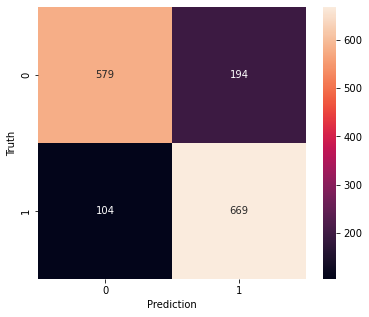

In [106]:
from matplotlib import pyplot as plt
import seaborn as sn
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize = (6,5))
sn.heatmap(con_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<span style='background:yellow'>Accuracy of the test data.</span>

In [86]:
accuracy = (579+669)/(194+104+579+669)
accuracy

0.8072445019404916

<span style='background:yellow'>In the 'e' step the accuracy was 0.8495. In that step measured the accuracy for the training data. At 'f' step the accuracy was measured for the test data and it was reduced to 0.81. Due to measured the accuracy for training data, accuracy was high at step 'e' than the accuracy for the test data (step 'f'). 0.81 is not a bad accuracy.</span>

Describe what happened and elaborate on model performance. 
Compare (e) model performance with (f).